Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.3447 - loss: 1.7675 - val_accuracy: 0.5375 - val_loss: 1.2938
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.5616 - loss: 1.2281 - val_accuracy: 0.5883 - val_loss: 1.1525
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.6277 - loss: 1.0585 - val_accuracy: 0.6203 - val_loss: 1.0709
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6698 - loss: 0.9378 - val_accuracy: 0.6571 - val_loss: 0.9647
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.6944 - loss: 0.8734 - val_accuracy: 0.6647 - val_loss: 0.9689
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7151 - loss: 0.8076 - val_accuracy: 0.6996 - val_loss: 0.8716
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7319 - loss: 0.7609 - val_accuracy: 0.6957 - val_loss: 0.8914
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.7468 -

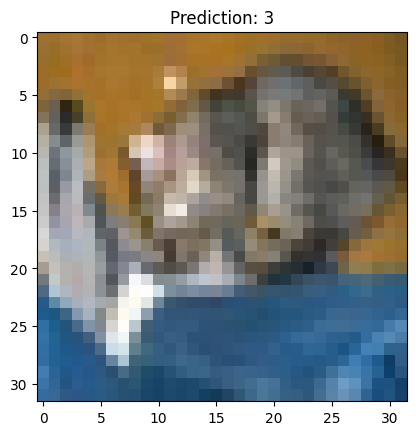

In [2]:

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt

# Step 1: Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Step 2: Normalize the images to values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 3: Build the CNN model
model = models.Sequential([
    Input(shape=(32, 32, 3)),  # Use Input layer for specifying input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Step 7: Make predictions on the test images
predictions = model.predict(test_images)

# Get the predicted class (the index of the highest probability)
predicted_class = predictions[0].argmax()

# Print the prediction for the first test image
print(f"Predicted class for the first image: {predicted_class}")

# Step 8: Display the first image and its prediction
plt.imshow(test_images[0])
plt.title(f"Prediction: {predicted_class}")
plt.show()
